# Deep Learning für Visual Computing: Übungsblatt 10

**Von: Maximilian Mundt, Radmehr Nouri Inanlou**

**Abgabe: 29.06.2022**

Da wir gestern den zweiten Sys-Inf Test geschrieben haben und wir dafür übers Wochenende lernen mussten, konnten wir uns leider nicht so viel mit dem Zettel beschäftigen. Deswegen fehlt der ganze GAN Teil und das Klassifizierungs-Netwerk von Aufgabe 1.

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from handout_ae import *
from handout_gan import * 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

Hier einmal die Device Auswahl und die Klassen des Datensatzes:

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
CLASSES = (
    "T-shirt/Top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
)

## a) Autoencoder

Wir lesen die Daten ein:

In [3]:
traindata = datasets.FashionMNIST("./data", train=True, transform=transforms.ToTensor(), download=True)
trainloader = DataLoader(traindata, batch_size=64, shuffle=True, num_workers=6)

testdata = datasets.FashionMNIST("./data", train=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(traindata, batch_size=5, shuffle=True)

Alternativ zum Training unten kann man das trainierte Modell so laden:

In [10]:
model = torch.load("model_220629_1330.pt")

Hier trainieren wir jetzt erstmal das Netzwerk mit dem Upsample Decoder. Damit es übersichtlicher bleibt, haben wir Encoder und Decoder nochmal in eine Klasse `AutoEncoder` gepackt. Dann kann man damit noch einfacher arbeiten:

In [4]:
encoder_upsample = Encoder(nn.LeakyReLU)
decoder_upsample = DecoderUpsample(nn.ReLU)

model = AutoEncoder(encoder_upsample, decoder_upsample).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters())

Wir trainieren für 30 Epochen und speichern das Modell:

Beginning epoch 1/30: loss = 0.018, elapsed time = 13.14 s
Beginning epoch 2/30: loss = 0.0154, elapsed time = 11.39 s
Beginning epoch 3/30: loss = 0.0142, elapsed time = 11.41 s
Beginning epoch 4/30: loss = 0.0136, elapsed time = 11.42 s
Beginning epoch 5/30: loss = 0.0133, elapsed time = 11.43 s
Beginning epoch 6/30: loss = 0.0125, elapsed time = 11.45 s
Beginning epoch 7/30: loss = 0.0123, elapsed time = 11.44 s
Beginning epoch 8/30: loss = 0.012, elapsed time = 11.44 s
Beginning epoch 9/30: loss = 0.0118, elapsed time = 11.49 s
Beginning epoch 10/30: loss = 0.0114, elapsed time = 11.78 s
Beginning epoch 11/30: loss = 0.0113, elapsed time = 11.89 s
Beginning epoch 12/30: loss = 0.011, elapsed time = 11.62 s
Beginning epoch 13/30: loss = 0.0111, elapsed time = 11.61 s
Beginning epoch 14/30: loss = 0.0107, elapsed time = 11.58 s
Beginning epoch 15/30: loss = 0.0107, elapsed time = 12.25 s
Beginning epoch 16/30: loss = 0.0105, elapsed time = 12.25 s
Beginning epoch 17/30: loss = 0.0106

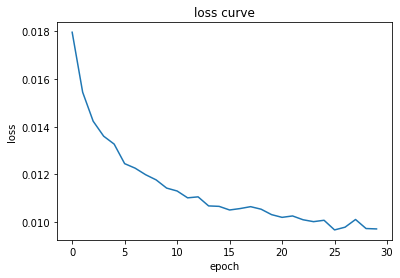

In [5]:
loss_curve = train_autoencoder(30, model, optimizer, trainloader, save=True)

plt.plot(loss_curve)
plt.title("loss curve")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

Wir waren uns nicht ganz sicher, was man bei der Evaluierung machen sollte, so etwas wie Accuracy im klassischen Sinne gibt es hier ja nicht? Deswegen haben wir einfach mal ein paar Bilder visualisiert, damit man eine Idee bekommt, wie der Autoencoder arbeitet. Er scheint die wichtigsten Merkmale von den Kleidungsstücken zu erfassen :)

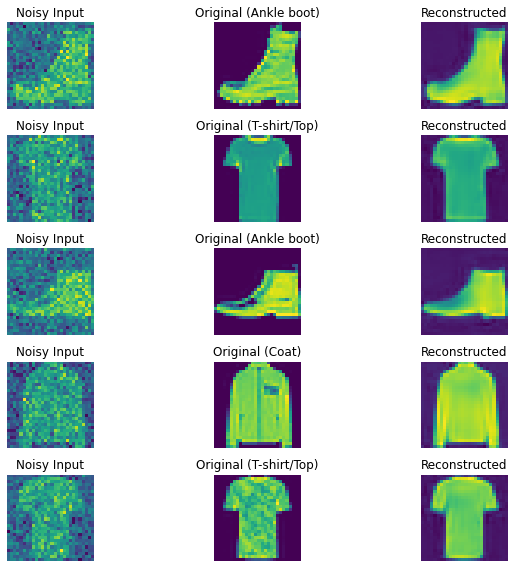

In [15]:
evaluate_autoencoder(model, testloader)

Hier hätten wir dann einen neuen AutoEncoder mit dem Transpose Decoder trainiert. Aus irgendeinem Grund ist die Output Size nach dem Decoder aber 64, 1, 6, 6, obwohl ja ein 28x28 Bild mit einem Farbchannel rauskommen sollte und kein 6x6 Bild. D.h. bei der Klasse `TransposeBlock` oder `DecoderTranspose` muss etwas schiefgelaufen sein, wir haben's aber nicht gelöst bekommen.

In [16]:
encoder_transpose = Encoder(nn.LeakyReLU)
decoder_transpose = DecoderTranspose(nn.ReLU)

model2 = AutoEncoder(encoder_transpose, decoder_transpose).to(DEVICE)
optimizer = torch.optim.Adam(model2.parameters())

loss_curve = train_autoencoder(10, model2, optimizer, trainloader, save=True)

plt.plot(loss_curve)
plt.title("loss curve")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

evaluate_autoencoder(model2, testloader)

Beginning epoch 1/10:

c:\Users\Maximilian\miniconda3\envs\pytorch-gpu\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([64, 1, 28, 28])) that is different to the input size (torch.Size([64, 1, 6, 6])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (6) must match the size of tensor b (28) at non-singleton dimension 3

## b) Generative Adverserial Networks

Nicht bearbeitet